<a href="https://colab.research.google.com/github/faisalalh1122/BootCampT5/blob/main/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('Task2.csv')
display(df)

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246
...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218


## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [17]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [18]:
#First change Date(Data type) to DateTime
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  float64       
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   62772 non-null  float64       
 8   TravelTimeLive       62772 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 4.6+ MB


### Identify and analyze patterns in the data.

In [60]:
HigerCityJams = df.groupby('City')[['JamsCount']].count()
print(HigerCityJams)

SumCityLenght = df.groupby('City')[['JamsLength']].sum()
print(SumCityLenght)

MaxCityDelay = df.groupby('City')[['JamsDelay']].max()
print(MaxCityDelay)

AvgCityDelay = df.groupby('City')[['JamsDelay']].mean()
print(AvgCityDelay)


          JamsCount
City               
Abudhabi       3864
Al-ain         3864
Cairo          8690
Dammam         3864
Doha           8692
Dubai          8690
Jeddah         3864
Kuwait         8691
Mecca          3864
Medina         3864
Riyadh         8692
          JamsLength
City                
Abudhabi     55287.2
Al-ain        8701.2
Cairo       346394.8
Dammam       77270.9
Doha        122420.4
Dubai       970006.7
Jeddah      138338.1
Kuwait      329087.4
Mecca        22754.4
Medina       14697.8
Riyadh     1201419.0
          JamsDelay
City               
Abudhabi     1289.7
Al-ain        250.9
Cairo        2601.3
Dammam       1979.4
Doha         3237.9
Dubai        9989.4
Jeddah       2251.9
Kuwait       3283.8
Mecca         670.7
Medina        477.9
Riyadh       5466.3
           JamsDelay
City                
Abudhabi  107.800285
Al-ain     22.606573
Cairo     269.112911
Dammam    123.072516
Doha      127.612057
Dubai     717.264856
Jeddah    182.129322
Kuwait    247.5786

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

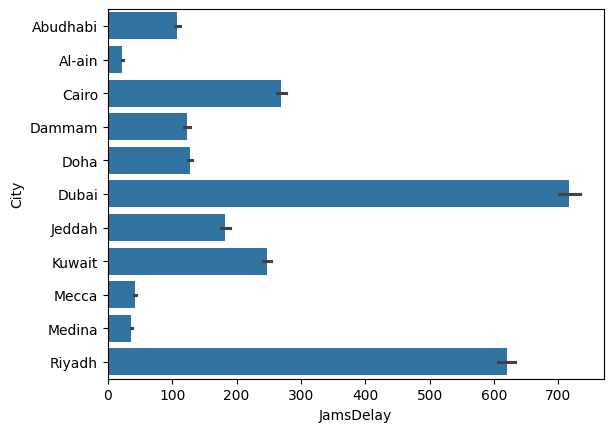

In [31]:
sns.barplot(x='JamsDelay', y='City', data=df)
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


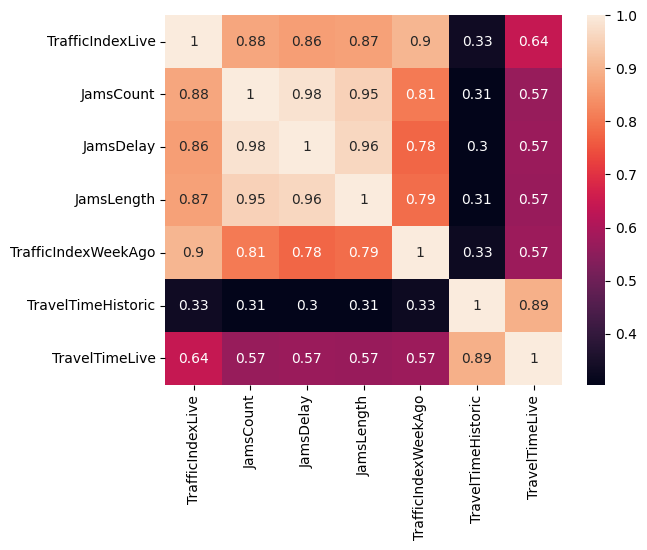

In [29]:
CorrTest = df.select_dtypes(include=['int64','float64'])
CorrTest.corr()
sns.heatmap(CorrTest.corr(), annot=True)
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


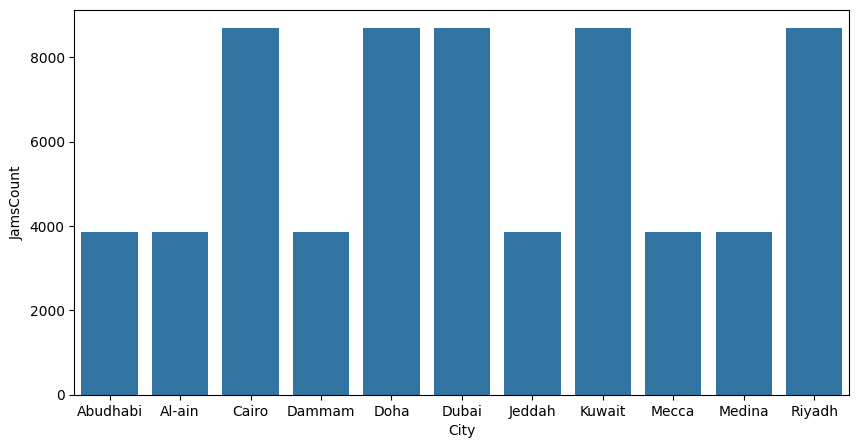

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='JamsCount', data=HigerCityJams)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

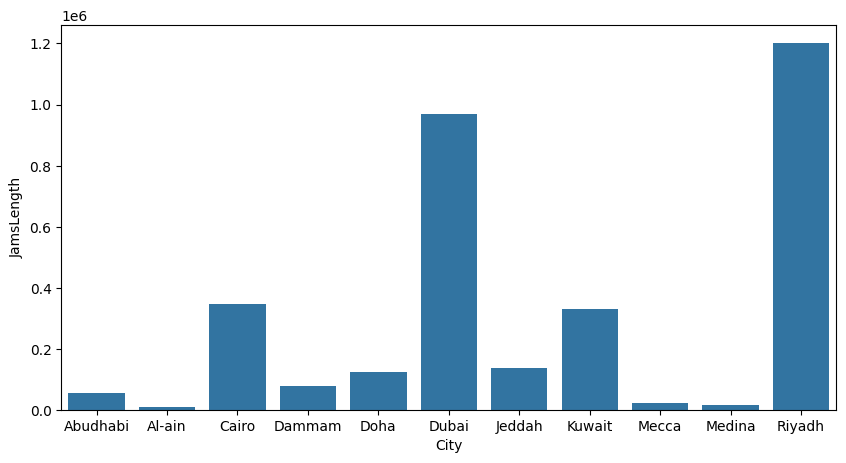

In [64]:
plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='JamsLength', data=SumCityLenght)
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
# Riyadh The Higer JamsCount city =8692
# Al-ain the the min average of JamesCount = 22.6